# **Computational Document 2: Computer Vision**

## *Analyzing photos of protests in Colombia (2021) from an article in The Atlantic*

Luis Felipe Villota Macías - MSc SSDA 21/23

Computational Content Analysis for the Social Sciences                


I present this computer vision assignment related to images (2D representations or visual pathways) in order to explore its content via *object detection* algorithms (to identify faces, colors and multiple other objects) (Szeliski, 2022; 19, 295). Concretely, those *detection* models are going to be applied on a small set of images (N=27), - that are all the extant photos in an article published in The Atlantic (2021) by A. Taylor. The publication and image data are an effort to document and report the 2021 protests and demonstrations accross Colombia during President Duque´s tenure (there were several socially upsetting factors at the time such as: high unemployment rates, the COVID-19 pandemic crisis, a tax reform project, e.g.).     

Following Szeliski's logic to work with computer vision (for a concrete application) (2022; 7), and having Taylor´s article on the Colombian case, - I part form the recognition of a potential (visual) problem or puzzle for the social sciences/public policies which can be aided by computational techniques: identifying police brutality during the massive social demonstrations (see Human Rights Watch, 2021).  

Exploratory in nature, this computer vision exercise might inspire  scaled-up studies in the future to monitor events such as protests (particularly the conduct of law enforcement officials) by observing the performance of the *detection* algorithms on the proposed image set.

## **Importing basic packages and setting the workspace**

In [1]:
# Python version 3.8.10

import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)

Python version
3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0)


!Note: In Google Colab I have the following parameters: Toolbar > RunTime > Change runtime type> Hardware Accelerator> GPU. If needed, please change again to Standard.


In [6]:
# Importing basic libraries into the Google Colab environment (Python)
#!pip install opencv-python
#!pip install --upgrade opencv-python
# In VS Code
import numpy as np
import skimage
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [ ]:
# Setting the workspace in Google Colab
# directory_path = '/content'
# os.chdir(directory_path)
# os.getcwd()



FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: '/content'

## **Loading image data from my Github repository (public): FelipeVillota/images_colombia**

The dataset comprises all 27 photographs from A. Taylor's  [article](https://www.theatlantic.com/photo/2021/05/photos-deadly-protests-across-colombia/618794/) "*Photos: Deadly Protests Across Colombia*" published in The Atlantic (2021). The images were downloaded manually from the article and saved in a Github repository.

In [4]:
!git clone https://github.com/FelipeVillota/images_colombia
os.chdir('images_colombia/protests_colombia')


Cloning into 'images_colombia'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), 5.37 MiB | 7.33 MiB/s, done.


In [5]:
os.getcwd()

'/content/images_colombia/protests_colombia'

## **Working with the PIL - PyPI Library**
I start with this library because I noticed some (initial) problematic implementations of OpenCV modules in Google Colab.

In [6]:
# Using the Pillow - PyPI Library first to create an list of the images 

from PIL import Image

image_list = []
for filename in os.listdir():
    if filename.endswith('.jpg'):  # iterating through the .jpg files
        img = Image.open(filename)
        image_list.append(img)

In [7]:
# Display of all 27 photographs

# Arranging Matplotlib parameters for image sizes
plt.rcParams['figure.figsize']= (10,8)
%matplotlib inline

for img in image_list:
    plt.imshow(img)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
image_list # Checking for image sizes in the list

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x7FF0BE991AF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x7FF023257910>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x564 at 0x7FF023257970>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x608 at 0x7FF023257A00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x598 at 0x7FF023257A60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x7FF023257AC0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x506 at 0x7FF023257B20>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x7FF023257B80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x7FF023257BE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x600 at 0x7FF023257C70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x598 at 0x7FF023257CD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x592 at 0x7FF0232

In [9]:
# After checking, we want them all to have: height= 600 and width= 900 pixels

image_list_resized = []

for filename in os.listdir():
    if filename.endswith('.jpg'):
        img_1 = Image.open(filename)
        
        # Resizing the width and height of images
        
        resized_img = img_1.resize((900, 600))
        image_list_resized.append(resized_img)


In [10]:
image_list_resized

[<PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F2C86A0>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F1962E0>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F196550>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0C8370>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0C8E50>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0C8400>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F238DF0>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F238C70>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0C8730>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0C82B0>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0C8B50>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0E3C70>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0E3B50>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0DB7C0>,
 <PIL.Image.Image image mode=RGB size=900x600 at 0x7FF01F0DB940>,
 <PIL.Imag

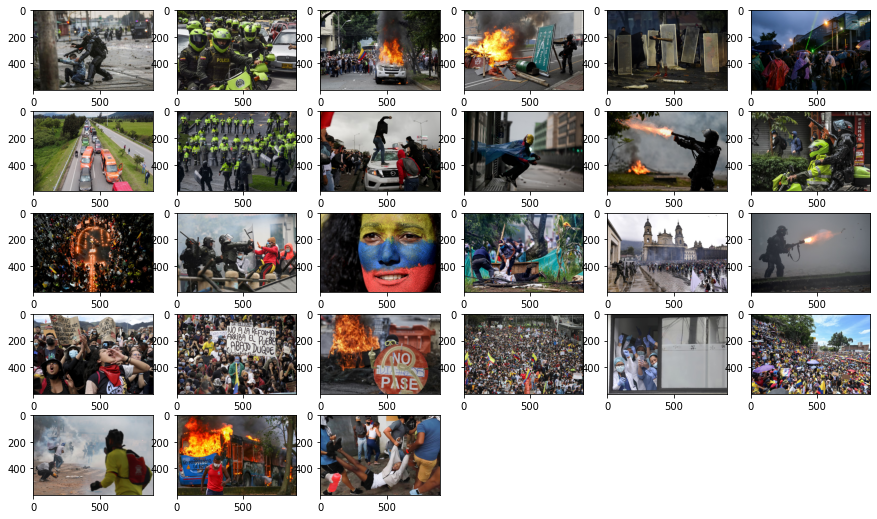

In [11]:
# Displaying all the 27 resized images in a grid style

import math
plt.rcParams['figure.figsize']= (15,9)


# Calculating the number of rows and columns needed for the grid display
num_images = len(image_list_resized)
num_rows = int(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows) # At the end we will have a ~5x6 grid

# Creating a grid of plots with plt.subplots
fig, axs = plt.subplots(num_rows, num_cols)

# "Flattening" the list of axes to iterate through them
axs = axs.flatten()

# Iterating through the images and ploting them on a grid
for i, img_1 in enumerate(image_list_resized):
    axs[i].imshow(img_1)
    axs[i].axis('on')

# Hiding the axes where there are no images
for j in range(i+1, num_rows*num_cols):
    axs[j].axis('off')

# Show the grid of plots
plt.show()


## **Working with OpenCV**

In [12]:
# From PIL - PyPI to OpenCV. At first we used PIL because some modules of OpenCV were not working well in Google Colab.

from google.colab.patches import cv2_imshow # I found this solution browsing the web.

# Now using OpenCV, I create a new list of images, apply resizing and conversion to RGB in a succint manner: 
image_list_cv2 = []

for filename in os.listdir():
    if filename.endswith('.jpg'):
        numpy_img_3 = cv2.imread(filename) # representation of images as numpy arrays of pixels (BGR vector format)
        resized_img_3= cv2.resize(numpy_img_3, (900, 600)) # Resizing the width and height of images
        resized_img_3_rgb= cv2.cvtColor(resized_img_3, cv2.COLOR_BGR2RGB)# conversion to RGB
        image_list_cv2.append(resized_img_3_rgb) # final append to the list to save all values


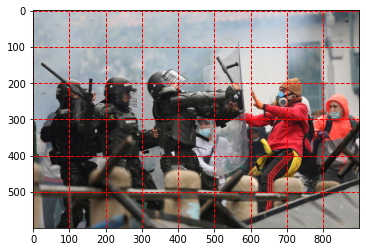

In [13]:
# Displaying just one example with a Cartesian grid on it: 

#Parameters
plt.rcParams['figure.figsize']= (14,9)
%matplotlib inline
fig, ax = plt.subplots()

# Image
img_example1_cv2 =image_list_cv2[13]
ax.imshow(img_example1_cv2)

# Grid
ax.grid(color='r', linestyle='--', linewidth=1)

plt.show()

This previous visualization could be interesting to measure the angles in which the law enforcement officials implement their "deterrent weapons". This is important if one is to judge or not police (mis)conduct that can seriously threaten the integrity of protesters (aiming for heads, places, e.g.) in a concrete context, for example (see Human Rights Watch, 2021). Of course, the same can be applied for protesters.

In [14]:
resized_img_3_rgb.shape # ndarray (of images) with 600 rows, 900 columns, 3 color channels

(600, 900, 3)

### **Detecting the colors of the image dataset: clustering using K-means**

In [15]:
# I want to detect the color proportions for each image in the dataset and plot them (as pie charts) alongside the corresponding original images.

K=15 # Number of clusters

# Iterating through our last image list (with all transformation values saved)
for image in image_list_cv2:
    
    pixel_values = image.reshape((-1, 3))# Flattening the images into a 2D array of pixels (each pixel in a RGB value format)
    pixel_values = np.float32(pixel_values)  # Converting the pixel values to floating-point numbers
    
    # Determining the criteria to apply K-means clustering to the pixel values
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 12, 3.0) # parameters for iterations and accuracy
    flags = cv2.KMEANS_RANDOM_CENTERS # random centers method
    compactness, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, flags) # K-means clustering to pixel values
    
    # Color counts
    label_counts = np.bincount(labels.flatten())# Count of each color label
    proportions = label_counts / np.sum(label_counts)# Proportions of each color
    centers = np.uint8(centers)# centers into uint8 (to represent color values from 0 to 255)

    # Creating pie charts along with original images
    plt.figure(figsize=(14,14))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.imshow(image)
    ax1.axis('on')
    ax2.pie(proportions, colors=[tuple(center/255) for center in centers], autopct='%1.1f%%', startangle=90) #subplot parameters
    ax2.axis('equal') #circular shape
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

From these plots, it is interesting to note that bright greens often signal the presence of common police, - wheareas members of the ESMAD (elite group specialized in "containing" protests) are in black and might be more difficult to "detect" in further analyses (darker colors prevail in the dataset). Although, there are occassions in which ESMAD members put on common police gear and vice versa. This could be an important element to consider if one is to render judgment on the (mis)conduct of law enforcement officials in massive demonstrations via computer vision. Another interesting point is that potential (violent) events are visually associated with bright oranges and yellows (signaling fires, shots, e.g.), - although this requires further study (there are other forms of violence without fire).        

### **Face Detection**

#### The Haar cascade model

In [16]:
# First I apply the Haar cascade model to detect faces and display its results

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Still looping in 'image_list_cv2'
for image in image_list_cv2:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Images to grayscale
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=2, minSize=(6, 6))# Detect faces in the grayscale image using the face detection model

    # Detection rectangles for the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Plot the image with the detected faces
    rgb_image_4 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2_imshow(rgb_image_4)

Output hidden; open in https://colab.research.google.com to view.

The built-in Haar model in OpenCV does not appear very suitable to detect faces in a demonstration. The 'minNeighbors' and 'minSize' parameters (in the 'detectMultiScale' method of the object 'face_cascade') have to be adjusted in regards to the type of photograph taken (here we have different zooms/angles on people and that causes the model to miss various faces  and to detect a significant number of false positives, e.g.). Moreover some police officials wear helments, hats, e.g. and some protesters have facemasks, e.g.; - which I assume difficults the detection task even more. I will try to implement another model.

#### The Multi-Task Cascaded Convolutional Networks (MTCNN) model

In [17]:
!pip install mtcnn
from mtcnn import MTCNN

# The MTCNN detector
det = MTCNN()

# Still looping for images in 'image_list_cv2'
for image in image_list_cv2:
    faces = det.detect_faces(image) # Detection 
    
    # Rectangles for the faces detected
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
        
    # Display with cv2
    rgb_image_5 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2_imshow(rgb_image_5)

Output hidden; open in https://colab.research.google.com to view.

Still a great number of false positives and missed faces, yet the MTCNN model appears to be a much more suitable option to detect faces in this complex scenario. According to (Ma et al., 2020; 2435), it uses deep learning methods (trained on large datasets of faces) in multiple stages, surpassing (in accuracy) traditional approaches such as the Haar cascade model.

### **Object Detection**

In [18]:
# Applying object detection on images from our working directory. I draw and customize the code from the lab6-cv3.ipynb
# document by Prof. Nils Holmberg (for the SIMM71 course).

!pip install -q transformers # NLP package
!pip install -q timm # image classification package
from transformers import pipeline # interface for the model to operate with image data
model = pipeline("object-detection") # Detection model to apply on images

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 12.4 MB/s eta 0:00:00


No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


/usr/local/lib/python3.8/dist-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/models/detr/image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [19]:
# Object detection for all 27 .jpg images in the directory

import glob # To find and match pathnames

rows_list_dict = [] # New object containing "dictionaries" of each image and its detection results/values 
for filename in sorted(glob.glob('*.jpg')): # Looping for filenames for the specific .jpg format 
  dictionary_1 = {} # New object
  results = model(filename) # To return a classification result for the images
  dictionary_1.update({"image": filename, "result": results}) # updating values
  rows_list_dict.append(dictionary_1) # appending the values

dataf = pd.DataFrame(rows_list_dict) # conversion to a data frame

In [20]:
print(dataf)

     image                                             result
0    1.jpg  [{'score': 0.9622141718864441, 'label': 'perso...
1   10.jpg  [{'score': 0.9805155992507935, 'label': 'perso...
2   11.jpg  [{'score': 0.9976896047592163, 'label': 'perso...
3   12.jpg  [{'score': 0.956421434879303, 'label': 'umbrel...
4   13.jpg  [{'score': 0.9381093978881836, 'label': 'perso...
5   14.jpg  [{'score': 0.9928713440895081, 'label': 'cell ...
6   15.jpg  [{'score': 0.9571987986564636, 'label': 'perso...
7   16.jpg  [{'score': 0.9335277080535889, 'label': 'perso...
8   17.jpg  [{'score': 0.9624138474464417, 'label': 'perso...
9   18.jpg  [{'score': 0.9990202188491821, 'label': 'perso...
10  19.jpg  [{'score': 0.909330427646637, 'label': 'backpa...
11   2.jpg  [{'score': 0.959860622882843, 'label': 'kite',...
12  20.jpg  [{'score': 0.9789912700653076, 'label': 'motor...
13  21.jpg  [{'score': 0.9049345850944519, 'label': 'perso...
14  22.jpg  [{'score': 0.9820079207420349, 'label': 'stop ...
15  23.j

In [21]:
# Creating an updated data frame 

rows_list_dict = []
for index, row in dataf.iterrows():  # Iterating trhough the rows
  for i in row.result:
    dictionary_1 = {}
    dictionary_1.update({"image":row.image}) # 'image' column repeated for each row 
    dictionary_1.update(i) # with due values
    rows_list_dict.append(dictionary_1) # saving everything again in 'rows_list_dict'

dataf_updated = pd.DataFrame(rows_list_dict)

In [22]:
print(dataf_updated)

     image     score          label  \
0    1.jpg  0.962214         person   
1    1.jpg  0.902980         person   
2    1.jpg  0.905120         person   
3    1.jpg  0.981238         person   
4    1.jpg  0.924059         person   
..     ...       ...            ...   
222  9.jpg  0.995852  traffic light   
223  9.jpg  0.996385         person   
224  9.jpg  0.983947         person   
225  9.jpg  0.990483         person   
226  9.jpg  0.992804         person   

                                                   box  
0    {'xmin': 37, 'ymin': 331, 'xmax': 287, 'ymax':...  
1    {'xmin': 716, 'ymin': 259, 'xmax': 878, 'ymax'...  
2    {'xmin': 725, 'ymin': 241, 'xmax': 787, 'ymax'...  
3     {'xmin': 0, 'ymin': 92, 'xmax': 98, 'ymax': 259}  
4    {'xmin': 756, 'ymin': 225, 'xmax': 798, 'ymax'...  
..                                                 ...  
222  {'xmin': 251, 'ymin': 79, 'xmax': 276, 'ymax':...  
223  {'xmin': 268, 'ymin': 150, 'xmax': 603, 'ymax'...  
224  {'xmin': 184,

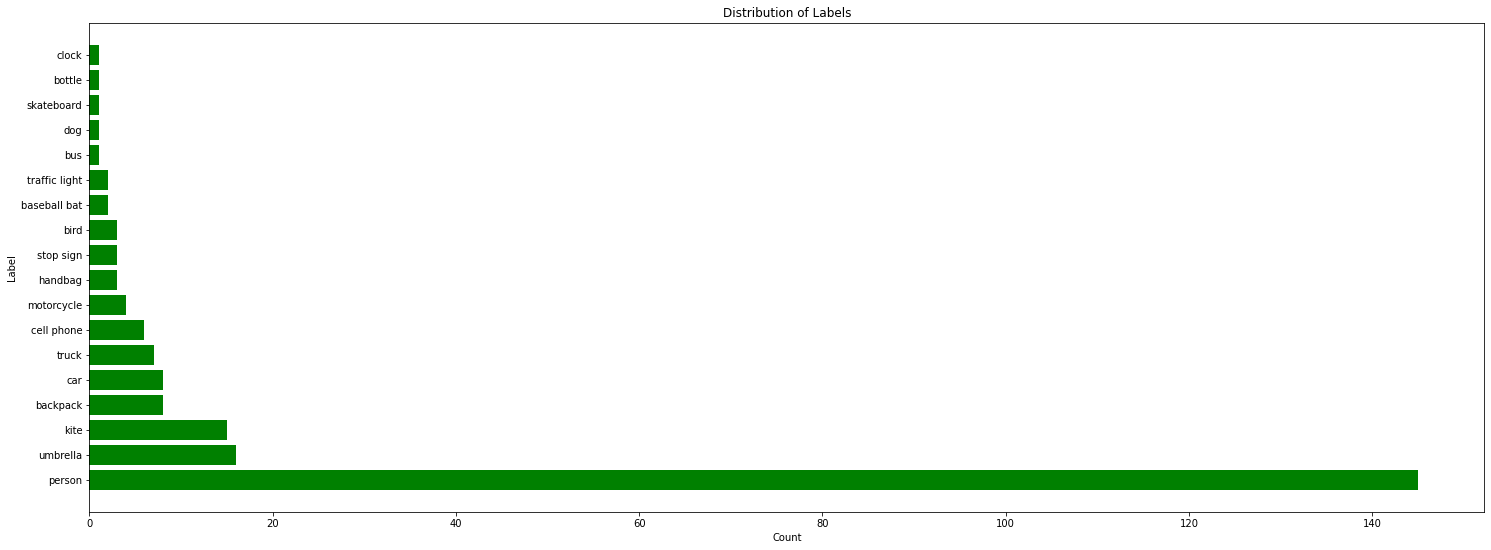

In [23]:
# Displaying the total counts of objects detected (total counts of values for the 'label' column)
# in all the images in the directory


# Counting the frequency of the value of each label
label_counts = dataf_updated.label.value_counts()

# Plotting the counts in a bar chart (horizontal format) 
plt.figure(figsize=(25,9))
plt.barh(label_counts.index, label_counts.values, color=['green'])

# Title and axis labels
plt.title('Distribution of Labels')
plt.ylabel('Label')
plt.xlabel('Count')

# Displaying
plt.show()


As we can see, the most common object in the dataset is of course people count = >140 . Interestingly, the model identifies trucks, cars, motorcycles and traffic lights, e.g. (common objects in a street scenario). Also, it detects common objects in a demonstration: such as handbags and umbrellas. However, it detects flags as kites which might be problematic. Importantly, it does not identify weapons (the detection of baseball bats is somehow intriguing). 

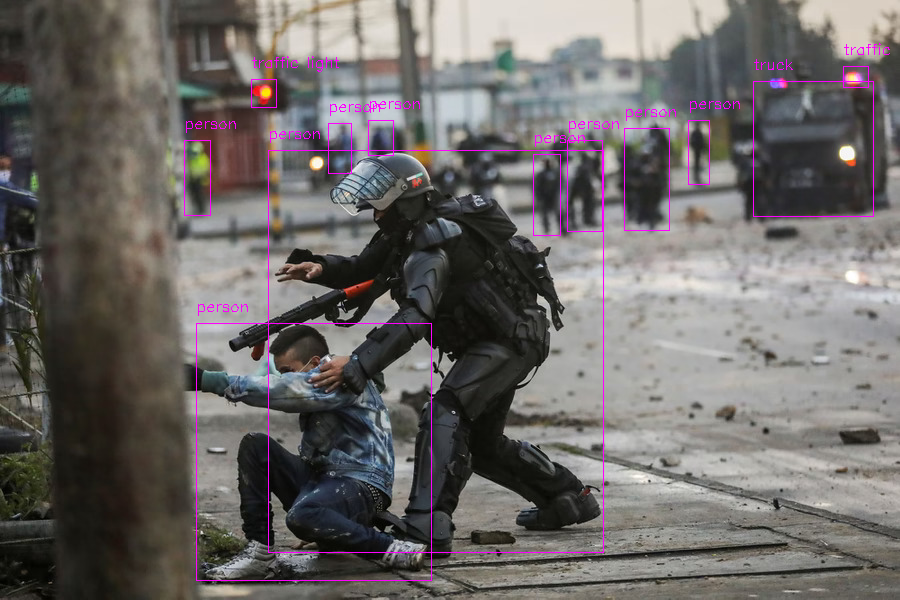

In [25]:
# Displaying one image as an example with the objects detected.

image_final = cv2.imread('9.jpg')

for index, row in dataf_updated[dataf_updated.image == "9.jpg"].iterrows():
    x1, y1, x2, y2 = list(row.box.values())
    label = row.label
    color = (255,0, 255)
    thickness = 1
    font_scale = 0.5
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    text_size, _ = cv2.getTextSize(label, font_face, font_scale, thickness)
    cv2.rectangle(image_final, (x1, y1), (x2, y2), color, thickness)
    cv2.putText(image_final, label, (x1, y1 - text_size[1]), font_face, font_scale, color, thickness)

cv2_imshow(image_final)


Here is a final example of object detection, the model provided in the mentioned lab session document of the course applies very well to this image. 

## **References**

Human Rights Watch. (2021, June 9). Colombia: Brutalidad policial contra manifestantes. Human Rights Watch. https://www.hrw.org/es/news/2021/06/09/colombia-brutalidad-policial-contra-manifestantes

Ma, L.-H., Fan, H.-Y., Lu, Z.-M., & Tian, D. (2020). Acceleration of multi-task cascaded convolutional networks. IET Image Processing, 14(11), 2435–2441. https://doi.org/10.1049/iet-ipr.2019.0141

Szeliski, R. (2022). Computer Vision: Algorithms and Applications. Springer International Publishing. https://doi.org/10.1007/978-3-030-34372-9

Taylor, A. (2021, May 4). Photos: Deadly Protests Across Colombia. The Atlantic. https://www.theatlantic.com/photo/2021/05/photos-deadly-protests-across-colombia/618794/


